In [1]:
import sounddevice as sd


from source.processing import *
from config.settings import PROCESSING

from source.training import get_model

from utils.plotting import plot_spectrogram

In [2]:
freq = fft_frequencies(sr=PROCESSING.sampling_rate, n_fft=PROCESSING.n_fft)
log_freq = log_scale_freq(freq, log_base=PROCESSING.log_base, num_samples=PROCESSING.num_samples)[0]

In [3]:
x_train, y_train, x_test, y_test, scalars = load_split_tensors(PROCESSING.tensors_folder)

In [4]:
x_train.shape

(24, 512, 256, 2)

In [5]:
AE, E, D = get_model()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 512, 256, 2)]     0         
                                                                 
 Encoder (Sequential)        (None, 256)               34244320  
                                                                 
 Decoder (Sequential)        (None, 512, 256, 2)       4453922   
                                                                 
Total params: 38,698,242
Trainable params: 38,698,242
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
AE.fit(x_train, y_train, validation_data=(x_test, y_test), batch_size=10, epochs=200, verbose=1)

Epoch 1/200
3/3 [==============================] - 4s 1s/step - loss: 0.1648 - val_loss: 0.1360
Epoch 2/200
3/3 [==============================] - 3s 948ms/step - loss: 0.1298 - val_loss: 0.1083
Epoch 3/200
3/3 [==============================] - 3s 954ms/step - loss: 0.1059 - val_loss: 0.0879
Epoch 4/200
3/3 [==============================] - 3s 971ms/step - loss: 0.0807 - val_loss: 0.0722
Epoch 5/200
3/3 [==============================] - 3s 970ms/step - loss: 0.0698 - val_loss: 0.0626
Epoch 6/200
3/3 [==============================] - 3s 1s/step - loss: 0.0613 - val_loss: 0.0578
Epoch 7/200
3/3 [==============================] - 3s 963ms/step - loss: 0.0570 - val_loss: 0.0557
Epoch 8/200
3/3 [==============================] - 3s 984ms/step - loss: 0.0554 - val_loss: 0.0533
Epoch 9/200
3/3 [==============================] - 3s 980ms/step - loss: 0.0532 - val_loss: 0.0518
Epoch 10/200
3/3 [==============================] - 3s 979ms/step - loss: 0.0515 - val_loss: 0.0503
Epoch 11/200
3/

In [16]:
batch = AE.predict(x_train)

In [17]:
batch.shape

(24, 512, 256, 2)

In [18]:
restored_tensor = batch_to_tensor(batch)

In [19]:
restored_sg = tensor_to_spectrogram(restored_tensor, scalars['y'])

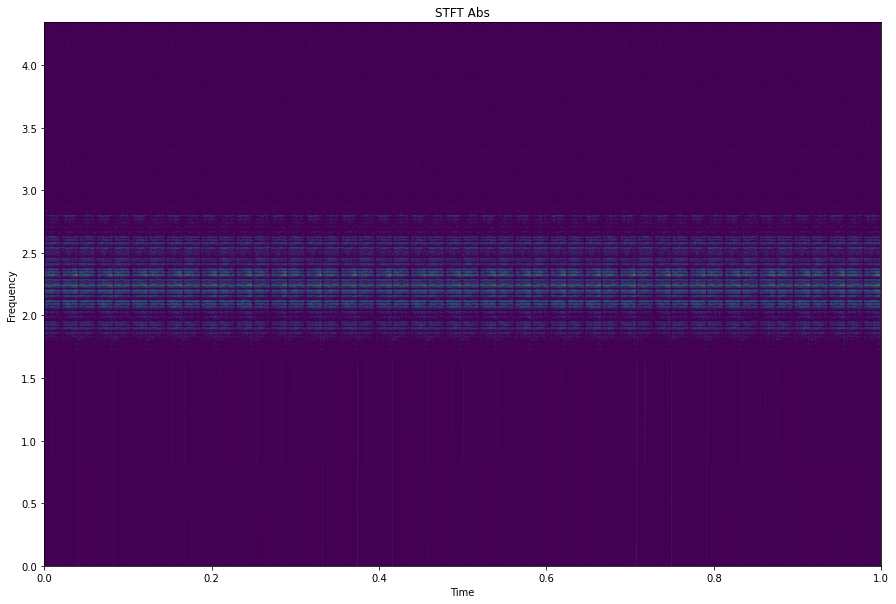

In [20]:
plot_spectrogram(log_freq, restored_sg, mode='Abs')

In [21]:
rescaled_restored_sg = inverse_log_scale(log_freq, restored_sg)

In [22]:
restored_audio = spectrogram_to_wav(rescaled_restored_sg, PROCESSING.sampling_rate)(win_length=PROCESSING.win_length, n_fft=PROCESSING.n_fft)

In [23]:
sd.play(*restored_audio)

In [24]:
sd.stop()